In [59]:
import sys
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as matplt
%matplotlib inline
#setting rootdirectory path 
rootdir = '/usr/bin/MachineLearning/WestNileVirusPrediction/'

In [68]:
weather = pd.read_csv(rootdir+'weather.csv')

In [62]:
weather_dataframe.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [69]:
# Not using codesum for this benchmark
weather = weather.drop('CodeSum', axis=1)

# Split station 1 and 2 and join horizontally
weather_stn1 = weather[weather['Station']==1]
weather_stn2 = weather[weather['Station']==2]
weather_stn1 = weather_stn1.drop('Station', axis=1)
weather_stn2 = weather_stn2.drop('Station', axis=1)
weather = weather_stn1.merge(weather_stn2, on='Date')

In [73]:
weather.dtypes

Date              object
Tmax_x             int64
Tmin_x             int64
Tavg_x            object
Depart_x          object
DewPoint_x         int64
WetBulb_x         object
Heat_x            object
Cool_x            object
Sunrise_x         object
Sunset_x          object
Depth_x           object
Water1_x          object
SnowFall_x        object
PrecipTotal_x     object
StnPressure_x     object
SeaLevel_x        object
ResultSpeed_x    float64
ResultDir_x        int64
AvgSpeed_x        object
Tmax_y             int64
Tmin_y             int64
Tavg_y            object
Depart_y          object
DewPoint_y         int64
WetBulb_y         object
Heat_y            object
Cool_y            object
Sunrise_y         object
Sunset_y          object
Depth_y           object
Water1_y          object
SnowFall_y        object
PrecipTotal_y     object
StnPressure_y     object
SeaLevel_y        object
ResultSpeed_y    float64
ResultDir_y        int64
AvgSpeed_y        object
dtype: object

In [78]:
weather[["Date","Tmax_x","Tmax_y"]].head()

,Date,Tmax_x,Tmax_y
0,2007-05-01,83,84
1,2007-05-02,59,60
2,2007-05-03,66,67
3,2007-05-04,66,78
4,2007-05-05,66,66


In [36]:

#reading training.csv into train_dataframe
train_dataframe = pd.read_csv(rootdir+"train.csv")

#Bringing Target WnvPresent Column as 1st column in the dataframe
train_columns = train_dataframe.columns.tolist()
train_columns = train_columns[-1:] + train_columns[:-1]
train_dataframe = train_dataframe[train_columns]



#reading test.csv into train_dataframe
test_dataframe = pd.read_csv(rootdir+"test.csv")



In [24]:
train_dataframe.dtypes

WnvPresent                          int64
Latitude                          float64
Longitude                         float64
Species_CULEX PIPIENS             float64
Species_CULEX PIPIENS/RESTUANS    float64
Species_CULEX RESTUANS            float64
Species_CULEX SALINARIUS          float64
Species_CULEX TARSALIS            float64
Species_CULEX TERRITANS           float64
Block_11                          float64
Block_12                          float64
Block_13                          float64
Block_14                          float64
Block_15                          float64
Block_17                          float64
Block_18                          float64
Block_20                          float64
Block_21                          float64
Block_22                          float64
Block_24                          float64
Block_25                          float64
Block_27                          float64
Block_28                          float64
Block_29                          

In [8]:
test_dataframe.dtypes

Id                          int64
Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
dtype: object

I am thinking of using Species, Block, Latitude and Longitude for Prediction. Going to drop rest of the columns. 


In [37]:
train_dataframe = train_dataframe.drop(['Date','Address','Street','AddressNumberAndStreet','AddressAccuracy', 'NumMosquitos','Trap','Latitude','Longitude' ],1)

In [38]:
test_dataframe = test_dataframe.drop(['Id','Date','Address','Street','Trap','AddressNumberAndStreet','AddressAccuracy','Latitude','Longitude'],1)

In [14]:
#dropping un-necessary columns from training and test dataframe
#train_dataframe = train_dataframe.drop(['Date','Address','Block','AddressNumberAndStreet','AddressAccuracy', 'NumMosquitos' ],1)
#test_dataframe = test_dataframe.drop(['Id','Date','Address','Block','AddressNumberAndStreet','AddressAccuracy'],1)


In [39]:
train_dataframe["Species"].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS'], dtype=object)

In [40]:
test_dataframe["Species"].unique()

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'UNSPECIFIED CULEX', 'CULEX ERRATICUS'], dtype=object)

In [41]:
#test_dataframe.ix[test_dataframe["Species"]=='UNSPECIFIED CULEX'].Species = 'CULEX ERRATICUS'
test_dataframe.loc[test_dataframe.Species=='UNSPECIFIED CULEX','Species'] = 'CULEX ERRATICUS'

In [42]:
test_dataframe[test_dataframe["Species"]=='UNSPECIFIED CULEX'] 

,Species,Block


In [43]:

train_Species_dummies = pd.get_dummies(train_dataframe['Species'], prefix='Species')
train_Species_dummies = train_Species_dummies.drop('Species_CULEX ERRATICUS',axis = 1)
train_dataframe= train_dataframe.drop('Species',1)
train_dataframe = train_dataframe.join(train_Species_dummies.ix[:,:])

train_Block_dummies = pd.get_dummies(train_dataframe['Block'], prefix='Block')
train_Block_dummies = train_Block_dummies.drop('Block_10',axis = 1)
train_dataframe= train_dataframe.drop('Block',1)
train_dataframe = train_dataframe.join(train_Block_dummies.ix[:,:])


In [36]:
test_Species_dummies = pd.get_dummies(test_dataframe['Species'], prefix='Species')

In [37]:
test_Species_dummies.dtypes

Species_CULEX ERRATICUS           float64
Species_CULEX PIPIENS             float64
Species_CULEX PIPIENS/RESTUANS    float64
Species_CULEX RESTUANS            float64
Species_CULEX SALINARIUS          float64
Species_CULEX TARSALIS            float64
Species_CULEX TERRITANS           float64
dtype: object

In [44]:
test_Species_dummies = pd.get_dummies(test_dataframe['Species'], prefix='Species')
test_Species_dummies = test_Species_dummies.drop('Species_CULEX ERRATICUS',axis = 1)
test_dataframe= test_dataframe.drop('Species',1)
test_dataframe = test_dataframe.join(test_Species_dummies.ix[:,:])


test_Block_dummies = pd.get_dummies(test_dataframe['Block'], prefix='Block')
test_Block_dummies = test_Block_dummies.drop('Block_10',axis = 1)
test_dataframe= test_dataframe.drop('Block',1)
test_dataframe = test_dataframe.join(test_Block_dummies.ix[:,:])



In [20]:
#Converting TrainFrame categorical variables to dummy variables
train_Street_dummies = pd.get_dummies(train_dataframe['Street'], prefix='Street')
train_Street_dummies = train_Street_dummies.drop(train_Street_dummies.columns[0],axis = 1)
train_dataframe= train_dataframe.drop('Street',1)
train_dataframe = train_dataframe.join(train_Street_dummies.ix[:,:])

train_Trap_dummies = pd.get_dummies(train_dataframe['Trap'], prefix='Trap')
train_Trap_dummies = train_Trap_dummies.drop(train_Trap_dummies.columns[0],axis = 1)
train_dataframe= train_dataframe.drop('Trap',1)
train_dataframe = train_dataframe.join(train_Trap_dummies.ix[:,:])

train_Species_dummies = pd.get_dummies(train_dataframe['Species'], prefix='Species')
train_Species_dummies = train_Species_dummies.drop(train_Species_dummies.columns[0],axis = 1)
train_dataframe= train_dataframe.drop('Species',1)
train_dataframe = train_dataframe.join(train_Species_dummies.ix[:,:])



 




In [24]:
#Converting TestFrame categorical variables to dummy variables
test_Street_dummies = pd.get_dummies(test_dataframe['Street'], prefix='Street')
test_Street_dummies = test_Street_dummies.drop(test_Street_dummies.columns[0],axis = 1)
test_dataframe= test_dataframe.drop('Street',1)
test_dataframe = test_dataframe.join(test_Street_dummies.ix[:,:])

test_Trap_dummies = pd.get_dummies(test_dataframe['Trap'], prefix='Trap')
test_Trap_dummies = test_Trap_dummies.drop(test_Trap_dummies.columns[0],axis = 1)
test_dataframe= test_dataframe.drop('Trap',1)
test_dataframe = test_dataframe.join(test_Trap_dummies.ix[:,:])

test_Species_dummies = pd.get_dummies(test_dataframe['Species'], prefix='Species')
test_Species_dummies = test_Species_dummies.drop(test_Species_dummies.columns[0],axis = 1)
test_dataframe= test_dataframe.drop('Species',1)
test_dataframe = test_dataframe.join(test_Species_dummies.ix[:,:])




In [45]:
train_column_names_set = set(list(train_dataframe.columns.values))
test_column_names_set = set(list(test_dataframe.columns.values))

train_columns_notin_test = train_column_names_set - test_column_names_set
test_columns_notin_train = test_column_names_set - train_column_names_set


In [46]:
train_columns_notin_test

{'WnvPresent'}

In [47]:
test_columns_notin_train

{'Block_26'}

In [48]:

test_dataframe= test_dataframe.drop('Block_26',1)


In [28]:
train_dataframe['Street_ E 136TH ST'] = 0
train_dataframe['Street_ N KENNETH AVE']= 0
train_dataframe['Street_ N KILBOURN AVE'] = 0
train_dataframe['Street_ N MELVINA AVE'] = 0
train_dataframe['Street_ S BALTIMORE AVE'] = 0
train_dataframe['Street_ S LOOMIS ST'] = 0
train_dataframe['Street_ S OGLESBY AVE'] = 0
train_dataframe['Street_ W 112TH ST'] = 0
train_dataframe['Street_ W 120TH ST'] = 0
train_dataframe['Street_ W 63RD PL'] = 0
train_dataframe['Street_ W DAKIN ST'] = 0
train_dataframe['Trap_T002A'] = 0
train_dataframe['Trap_T002B'] = 0
train_dataframe['Trap_T065A'] = 0
train_dataframe['Trap_T090A'] = 0
train_dataframe['Trap_T090B'] = 0
train_dataframe['Trap_T090C'] = 0
train_dataframe['Trap_T128A'] = 0
train_dataframe['Trap_T200A'] = 0
train_dataframe['Trap_T200B'] = 0
train_dataframe['Trap_T218A'] = 0
train_dataframe['Trap_T218B'] = 0
train_dataframe['Trap_T218C'] = 0
train_dataframe['Trap_T234']=0

In [49]:
train_array = train_dataframe.values
test_array = test_dataframe.values

In [34]:
train_dataframe[train_dataframe['WnvPresent'== 1]]

KeyError: False

In [50]:
from sklearn import ensemble
import numpy
clf_et=ensemble.RandomForestClassifier(n_estimators=10,n_jobs=-1)
clf_et.fit(train_array[0::,1::],train_array[0::,0])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

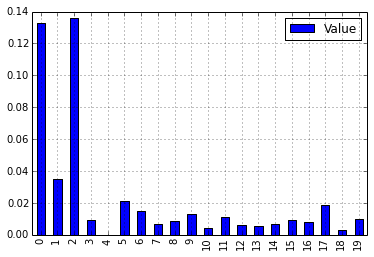

In [51]:
feature_importance_list = list(zip(clf_et.feature_importances_,list(train_array)))
feature_importance_frame = pd.DataFrame(feature_importance_list,columns=['Value','ColumnName'])

feature_importance_frame.sort(columns='Value',ascending=False)
feature_importance_frame.head(20).plot(kind='bar')



In [52]:
test_predict = clf_et.predict(test_array)



In [53]:
test_predict

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [54]:
numpy.savetxt("/usr/bin/MachineLearning/WestNileVirusPrediction/submission_1.csv",test_predict,delimiter=",")

In [55]:

#reading test.csv into train_dataframe
result_dataframe = pd.read_csv(rootdir+"submission_1.csv")

In [56]:
result_dataframe.dtypes

0.000000000000000000e+00    float64
dtype: object

In [57]:
result_dataframe['0.000000000000000000e+00'].unique()

array([ 0.])